In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Keras Imports
import tensorflow as tf
from keras import datasets
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation, Conv2D, MaxPooling2D, Dropout

# Load Data

In [4]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 164s 1us/step


In [5]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [6]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

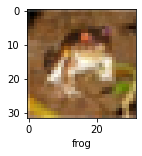

In [7]:
plot_sample(X_train, y_train, 0)

# Normalize training data before training the neural net

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [8]:
X_train = X_train/255
X_test = X_test/255

# Now build the Sequential Model and add layers into it

In [32]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))  # Pooling
model.add(Dropout(0.2)) # Dropout

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

# model.add(Conv2D(32, (5,5), padding='same', activation='relu'))
# model.add(Conv2D(32, (5,5), activation='relu'))
# model.add(MaxPooling2D((4,4)))
# model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation="softmax"))

In [33]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_33 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_34 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 conv2d_35 (Conv2D)          (None, 12, 12, 64)        36928     
                                                      

In [34]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [35]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=100, shuffle=True, callbacks=[early_stop])

Epoch 1/50
500/500 [==============================] - 117s 232ms/step - loss: 1.6819 - accuracy: 0.3691 - val_loss: 1.3782 - val_accuracy: 0.4948
Epoch 2/50
500/500 [==============================] - 112s 225ms/step - loss: 1.2295 - accuracy: 0.5550 - val_loss: 1.0827 - val_accuracy: 0.6106
Epoch 3/50
500/500 [==============================] - 128s 256ms/step - loss: 1.0352 - accuracy: 0.6314 - val_loss: 0.9609 - val_accuracy: 0.6654
Epoch 4/50
500/500 [==============================] - 126s 252ms/step - loss: 0.9084 - accuracy: 0.6802 - val_loss: 0.8382 - val_accuracy: 0.7071
Epoch 5/50
500/500 [==============================] - 116s 231ms/step - loss: 0.8196 - accuracy: 0.7114 - val_loss: 0.7701 - val_accuracy: 0.7287
Epoch 6/50
500/500 [==============================] - 119s 238ms/step - loss: 0.7519 - accuracy: 0.7343 - val_loss: 0.7979 - val_accuracy: 0.7236
Epoch 7/50
500/500 [==============================] - 120s 240ms/step - loss: 0.6961 - accuracy: 0.7559 - val_loss: 0.7013 -

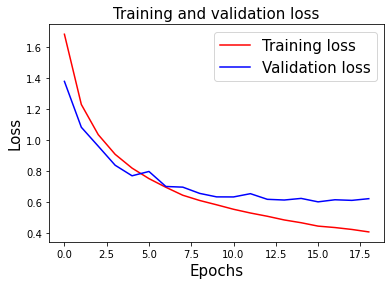

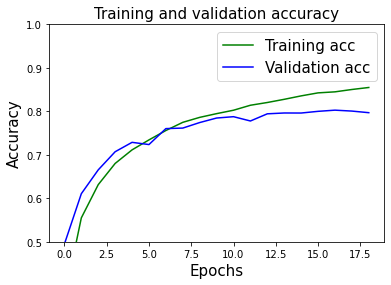

In [36]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = history.epoch

# plt.figure(figsize=(10,6))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', size=15)
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss', size=15)
plt.legend(prop={'size': 15})
plt.show()

# plt.figure(figsize=(10,6))
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy', size=15)
plt.xlabel('Epochs', size=15)
plt.ylabel('Accuracy', size=15)
plt.legend(prop={'size': 15})
plt.ylim((0.5,1))
plt.show()

# Evaluation of Model

In [37]:
acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.6156 - accuracy: 0.8027


In [38]:
print('The accuracy is' , round(acc[1], 3))

The accuracy is 0.803


313/313 [==============================] - 3s 10ms/step


Text(69.0, 0.5, 'Truth')

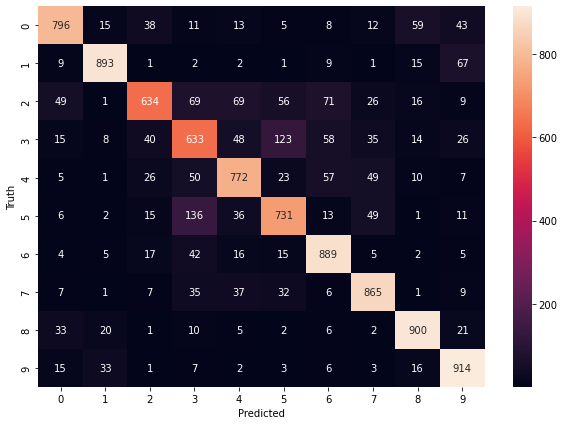

In [39]:
import tensorflow as tf

y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [40]:
from sklearn.metrics import confusion_matrix , classification_report

print("Classification Report: \n", classification_report(y_test, y_predicted_labels))

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.80      0.82      1000
           1       0.91      0.89      0.90      1000
           2       0.81      0.63      0.71      1000
           3       0.64      0.63      0.63      1000
           4       0.77      0.77      0.77      1000
           5       0.74      0.73      0.73      1000
           6       0.79      0.89      0.84      1000
           7       0.83      0.86      0.85      1000
           8       0.87      0.90      0.88      1000
           9       0.82      0.91      0.87      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000

